In [2]:
import tensorflow as tf 
from tensorflow.keras.layers import * 
from tensorflow.keras import Sequential
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator

import numpy as np
import os 
import matplotlib.pyplot as plt 

plt.style.use('seaborn')

C:\Users\leeky\AppData\Local\Temp\ipykernel_15880\3920983394.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
base_dir = 'C:\\Users\\leeky\\Desktop\\kaggle_cat_dog_ver2'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [4]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_cats_dir = os.path.join(validation_dir, 'cats')
train_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)

(150, 150, 3)
(1, 150, 150, 3)


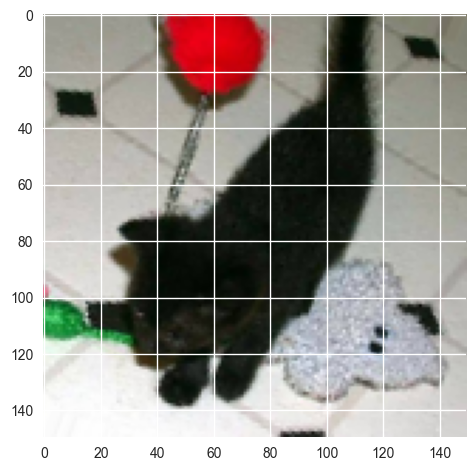

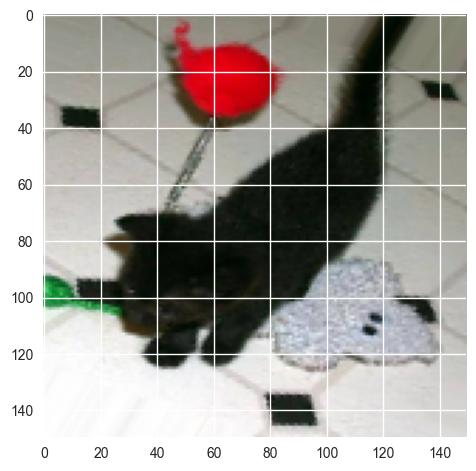

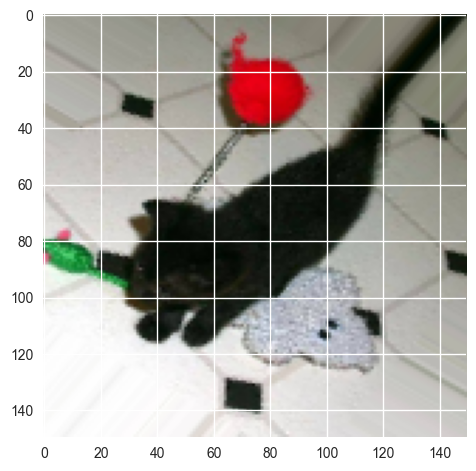

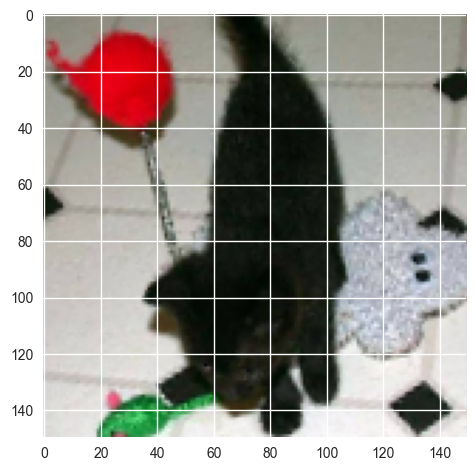

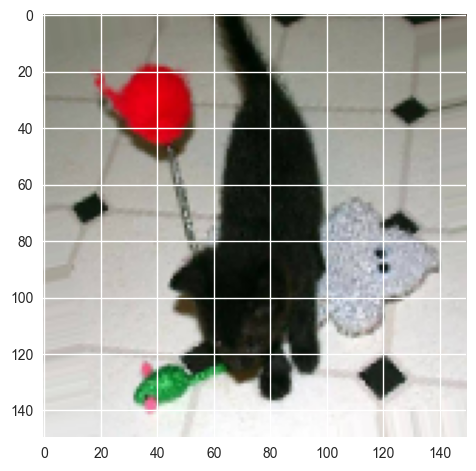

In [6]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    zoom_range=0.2,
    shear_range=0.2
)

img_path = os.path.join(train_cats_dir, train_cats_fnames[2])
img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)
print(x.shape)
x = x.reshape((1, ) + x.shape)
print(x.shape)
i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i%5 == 0:
        break

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 32개 필터, 크기3커널, 패딩 및 스트라이드 기본

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 64개 필터, 크기3커널, 패딩 및 스트라이드 기본


model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 128개 필터, 크기3커널, 패딩 및 스트라이드 기본

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 256개 필터, 크기3커널, 패딩 및 스트라이드 기본

# 완전연결 신경망
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       2

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [9]:
history = model.fit(train_generator, epochs=30, batch_size=128, validation_data=val_generator)

Epoch 1/30
63/63 [==============================] - 29s 367ms/step - loss: 1.1043 - acc: 0.5465 - val_loss: 0.6923 - val_acc: 0.4960
Epoch 2/30
63/63 [==============================] - 7s 116ms/step - loss: 0.6878 - acc: 0.5940 - val_loss: 0.9162 - val_acc: 0.5000
Epoch 3/30
63/63 [==============================] - 7s 116ms/step - loss: 0.6347 - acc: 0.6320 - val_loss: 0.8656 - val_acc: 0.5000
Epoch 4/30
63/63 [==============================] - 7s 114ms/step - loss: 0.6321 - acc: 0.6505 - val_loss: 1.6396 - val_acc: 0.5000
Epoch 5/30
63/63 [==============================] - 7s 115ms/step - loss: 0.5997 - acc: 0.6750 - val_loss: 0.9676 - val_acc: 0.5010
Epoch 6/30
63/63 [==============================] - 7s 116ms/step - loss: 0.5759 - acc: 0.6885 - val_loss: 1.5322 - val_acc: 0.5000
Epoch 7/30
63/63 [==============================] - 7s 115ms/step - loss: 0.5589 - acc: 0.7105 - val_loss: 1.4294 - val_acc: 0.5380
Epoch 8/30
63/63 [==============================] - 7s 113ms/step - loss: 0

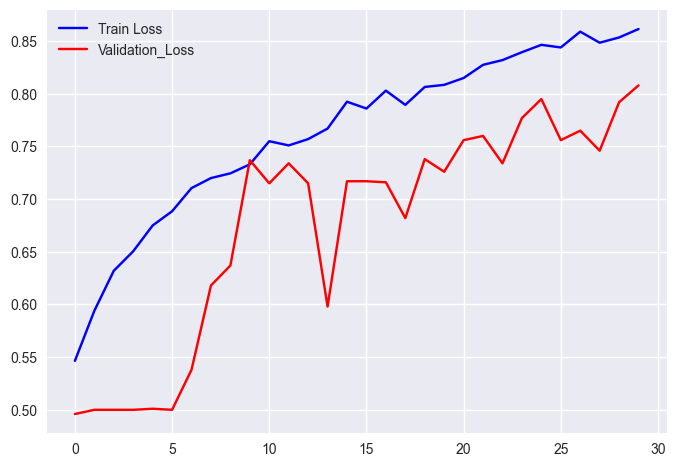

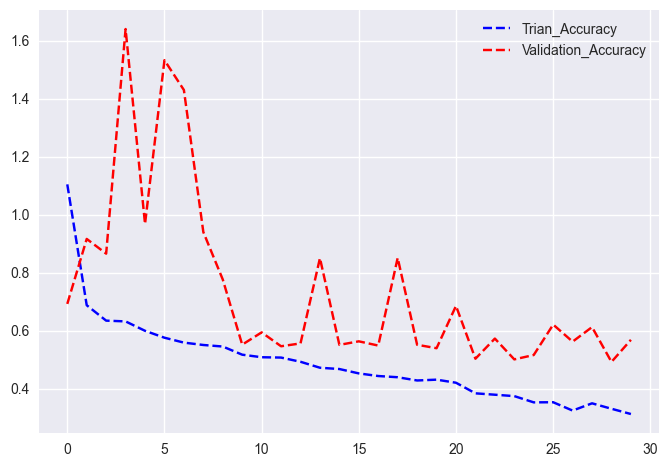

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b-', label='Train Loss')
plt.plot(epochs, val_acc, 'r-', label='Validation_Loss')
plt.grid(True)
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b--', label='Trian_Accuracy')
plt.plot(epochs, val_loss, 'r--', label='Validation_Accuracy')
plt.grid(True)
plt.legend()

plt.show()
 